<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/4Neural_Network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
for i in range(df.shape[0]):
  if(df.iloc[i]['y'] == 99999):
    df.loc[i, 'y'] = 4510

print(df.shape[0])
print(df['y'].max())
shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

8750
4510.0


In [2]:
X_modified = X.drop([ 'median','max', 'k', 'min', 'range',  'indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n','m'], axis = 1)
print(X_modified.head())
#X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

     n   n/m  av.length    std.dev
0   44  2.75  58.363636  26.032263
1   90  2.25  57.799999  24.828945
2  200  2.50  59.404999  23.528475
3  162  3.00  75.993828  16.085367
4   90  4.50  74.188889  14.736558


In [3]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(random_state=0)
X_modified, y = oversample.fit_resample(X_modified, y.astype('int'))
print(X_modified.shape[0])

from imblearn.over_sampling import SMOTE

smote_on_3 = 50
#oversample = SMOTE(sampling_strategy={99999:50000})
#X_modified, y = oversample.fit_resample(X_modified, y)
print(X_modified.shape[0])

tmp = X_modified
tmp['y'] = y
tmp = tmp.sample(frac = 1).reset_index()
y = tmp['y']
X_modified = tmp.drop(['y'], axis = 1)

1655304
1655304


In [4]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score

from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

import tensorflow
from tensorflow import keras 


def custom_activation(x):
    #return K.relu(tensorflow.subtract(x,-1)) - K.relu(tensorflow.subtract(x,1))
    return 4510*1/(1+K.exp(-x))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

def make_model():
    model = Sequential()
    
    model.add(Dense(8, input_dim=X_modified.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.1))

    #classifier.add(Dense(32, activation = 'relu'))
    #classifier.add(Dense(32, activation = 'relu'))
    #classifier.add(Dense(16, activation = 'relu'))

    #model.add(Dense(32, activation='relu'))

    #model.add(Dense(64, activation='relu'))

    #model.add(Dense(8, activation='relu'))
    
    model.add(Dense(1, activation = custom_activation))
    #model.add(Activation(custom_activation, name='SpecialActivation'))
    #model.compile(loss='mean_squared_error', optimizer=tensorflow.keras.optimizers.Adam(clipnorm=1))
    #model.compile(loss='mean_squared_error', optimizer='RMSProp')
    model.compile(loss='mean_squared_error', optimizer='Adam')
    return model

In [5]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc2 = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)


X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
#X_val = sc.transform(X_val)

#y_train = sc2.fit_transform(y_train.values.reshape(-1,1))
#y_test = sc2.transform(y_test.values.reshape(-1,1))

estimator = KerasRegressor(build_fn=make_model, epochs=20, batch_size=128, verbose=1)

#history=estimator.fit(X_train,y_train)
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = estimator.fit(X_train, y_train, shuffle = True)
#plt.plot(history.history['val_accuracy'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Epoch 1/20
10734/10734 [==============================] - 25s 2ms/step - loss: 38505.3594
Epoch 2/20
10734/10734 [==============================] - 16s 1ms/step - loss: 10354.1592
Epoch 3/20
10734/10734 [==============================] - 16s 1ms/step - loss: 9063.5166
Epoch 4/20
10734/10734 [==============================] - 16s 1ms/step - loss: 8600.1787
Epoch 5/20
10734/10734 [==============================] - 17s 2ms/step - loss: 8392.8770
Epoch 6/20
10734/10734 [==============================] - 16s 2ms/step - loss: 8130.0576
Epoch 7/20
10734/10734 [==============================] - 15s 1ms/step - loss: 7974.5620
Epoch 8/20
10734/10734 [==============================] - 16s 1ms/step - loss: 7963.4023
Epoch 9/20
10734/10734 [==============================] - 16s 1ms/step - loss: 7970.4702
Epoch 10/20
10734/10734 [==============================] - 16s 1ms/step - loss: 8104.1802
Epoch 11/20
10734/10734 [==============================] - 16s 1ms/step - loss: 7946.8711
Epoch 12/20
10734

In [6]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
print("r_square score: ", r2_score(y_test,prediction))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd)) 

2199/2199 [==============================] - 2s 1ms/step
r_square score:  0.9969128667498486
RMSE:


58.956927980852804

281402
281402
281402
1/1 [==============================] - 0s 17ms/step


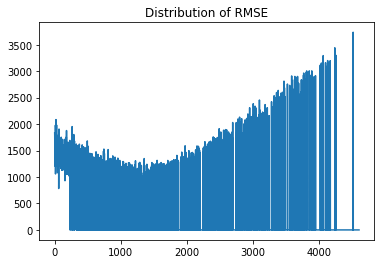

In [7]:
X_test_tmp = pd.DataFrame(X_test, columns = X_test_copy.columns)
tmp = X_test_tmp
tmp['y'] = y_test

uniq = tmp['y'].unique()
print(tmp.shape[0])
print(X_test_tmp.shape[0])
print(y_test.shape[0])


all_dict = {elem: pd.DataFrame() for elem in uniq}

results = np.zeros(4600)
for i in range(4580):
  results[i]=0

from sklearn.metrics import mean_squared_error
from math import sqrt


for key in all_dict:
  all_dict[key] = tmp[:][tmp['y'] == key]
  #print(all_dict[key].shape[0])
  y_test_key = all_dict[key]['y']
  X_test_key = all_dict[key].drop(['y'], axis = 1)
  #print(X_test_key.shape[0])
  if(X_test_key.shape[0] == 0):
    continue
  predicted = estimator.predict(X_test_key)
  predd = np.array(predicted)
  yy = np.array(y_test_key)
  key = int(key)
  results[key] = sqrt(mean_squared_error(yy, predd))

plt.title('Distribution of RMSE')
plt.plot(results)

19/19 [==============================] - 0s 2ms/step


Text(0.5, 0, '0->easy 1->moderate 2->hard 3->very hard')

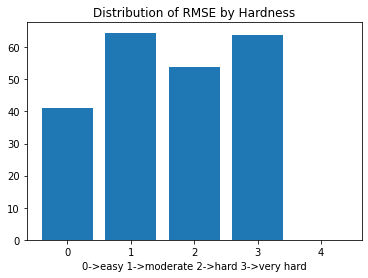

In [16]:
X_test_tmp = pd.DataFrame(X_test, columns = X_test_copy.columns)
tmp = X_test_tmp
tmp['y'] = y_test

tmp = tmp.dropna(axis=0)

hard = []
y_test=  np.array(y_test)
for i in range(tmp.shape[0]):
  if(y_test[i] < 10):
    hard.append(0)
  elif(y_test[i]>=10 and y_test[i]<100):
    hard.append(1)
  elif(y_test[i]>=100 and y_test[i]<1000):
    hard.append(2)
  else:
    hard.append(3)

tmp['hardness'] = hard

uniq = tmp['hardness'].unique()

all_dict = {elem: pd.DataFrame() for elem in uniq}

results = np.zeros(5)
for i in range(5):
  results[i]=0

from sklearn.metrics import mean_squared_error
from math import sqrt


for key in all_dict:

  all_dict[key] = tmp[:][tmp['hardness'] == key]
  X_test_key = all_dict[key].drop(['hardness', 'y'], axis = 1)
  y_test_key = all_dict[key]['y']
  if(X_test_key.shape[0] == 0):
    continue
  predicted = estimator.predict(X_test_key)
  predd = np.array(predicted)
  yy = np.array(y_test_key)
  key = int(key)
  results[key] = sqrt(mean_squared_error(yy, predd))

plt.title('Distribution of RMSE by Hardness')
plt.bar([0, 1, 2, 3, 4],results)
plt.xlabel("0->easy 1->moderate 2->hard 3->very hard")

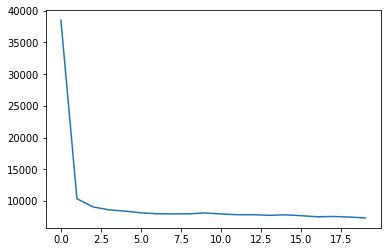

In [9]:
plt.plot(history.history['loss'])

In [10]:
from sklearn.metrics import r2_score
prediction = estimator.predict(X_test)
print("r_square score: ", r2_score(y_test,prediction))
#y_test = sc2.inverse_transform(y_test.reshape(-1,1))
yy = np.array(y_test)
#prediction = sc2.inverse_transform(prediction.reshape(-1,1))
predd = np.array(prediction)


av_bad = []
n_bad = []
std_dev_bad = []
#max_bad = []
nm_bad = []
#k_bad = []
#min_bad = []

av_good = []
n_good = []
std_dev_good = []
nm_good = []
#max_good = []
#k_good = []
#min_good = []

for i in range(len(yy)):
  if(abs(yy[i]-predd[i]) > 120):
    av_bad.append(X_test_copy.iloc[i]['av.length'])
    n_bad.append(X_test_copy.iloc[i]['n'])
    std_dev_bad.append(X_test_copy.iloc[i]['std.dev'])
    nm_bad.append(X_test_copy.iloc[i]['n/m'])
 #   max_bad.append(X_test_copy.iloc[i]['max'])
  #  k_bad.append(X_test_copy.iloc[i]['k'])
    #min_bad.append(X_test_copy.iloc[i]['min'])

    print("real value of y_test: " + str(yy[i]) + " -> the predict: " + str(predd[i]))
  if(abs(yy[i]-predd[i])<100 and yy[i]>99500):
    av_good.append(X_test_copy.iloc[i]['av.length'])
    n_good.append(X_test_copy.iloc[i]['n'])
    std_dev_good.append(X_test_copy.iloc[i]['std.dev'])
    nm_good.append(X_test_copy.iloc[i]['n/m'])
   # max_good.append(X_test_copy.iloc[i]['max'])
    #k_good.append(X_test_copy.iloc[i]['k'])
    #min_good.append(X_test_copy.iloc[i]['min'])



2199/2199 [==============================] - 2s 1ms/step
r_square score:  0.9969128667498486
real value of y_test: 4249 -> the predict: 4127.5034
real value of y_test: 73 -> the predict: 338.74844
real value of y_test: 4506 -> the predict: 4280.8774
real value of y_test: 4233 -> the predict: 4101.213
real value of y_test: 2087 -> the predict: 4502.216
real value of y_test: 4506 -> the predict: 4282.3213
real value of y_test: 56 -> the predict: 224.51735
real value of y_test: 4233 -> the predict: 4101.477
real value of y_test: 4233 -> the predict: 4095.7654
real value of y_test: 56 -> the predict: 223.05513
real value of y_test: 4233 -> the predict: 4104.4097
real value of y_test: 101 -> the predict: 309.84897
real value of y_test: 4233 -> the predict: 4097.2524
real value of y_test: 4233 -> the predict: 4104.372
real value of y_test: 4506 -> the predict: 4276.4077
real value of y_test: 67 -> the predict: 222.60681
real value of y_test: 4506 -> the predict: 4281.9507
real value of y_tes

In [11]:
print(np.max(predd))

4510.0


In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE:")
sqrt(mean_squared_error(yy, predd)) 

RMSE:


58.956927980852804

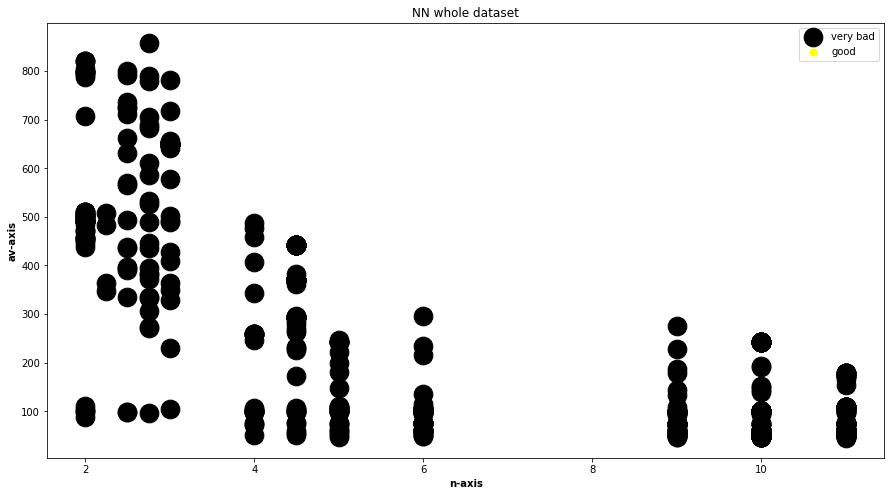

In [13]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes()

ax.scatter(nm_bad, av_bad, s = 350, color = 'black')
ax.scatter(nm_good, av_good, s= 50, color = 'yellow')

ax.set_xlabel('n-axis', fontweight ='bold')
ax.set_ylabel('av-axis', fontweight ='bold')
plt.title("NN whole dataset")
 
ax.legend(['very bad', 'good'])
# show plot
plt.show()

NameError: ignored

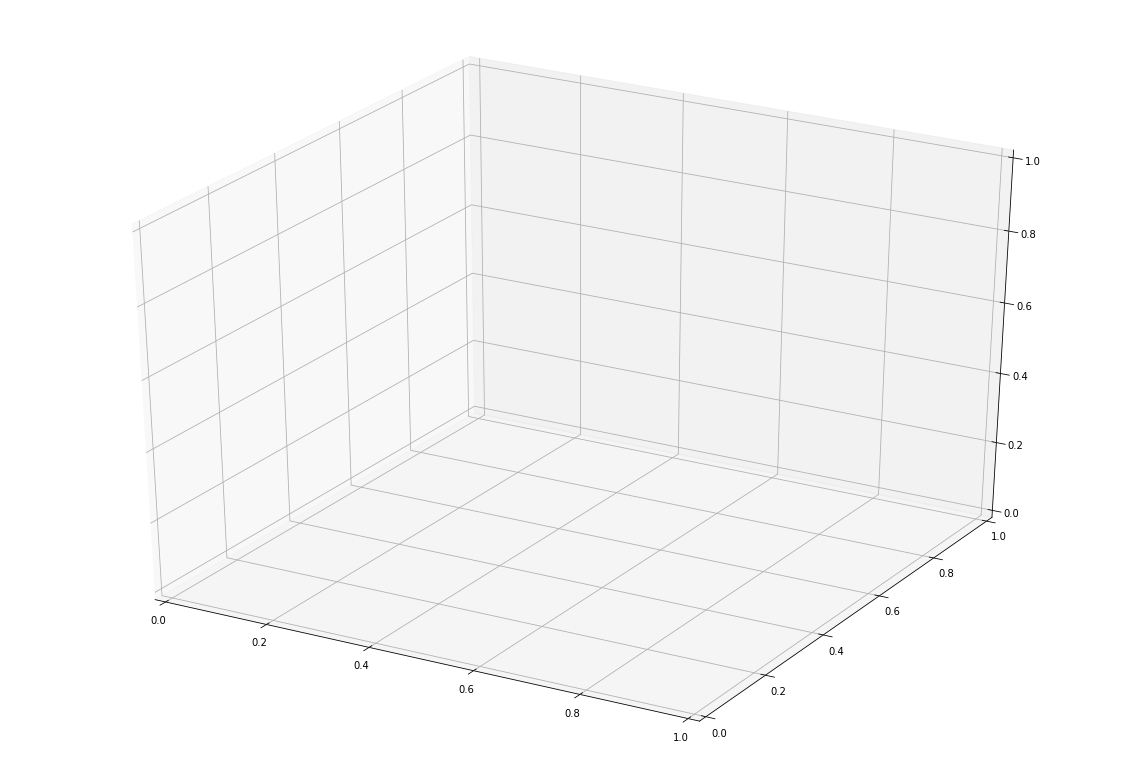

In [14]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (20, 14))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

ax.scatter3D(max_good, n_good, k_good, s = 50, color = 'yellow')
ax.scatter3D(max_bad, n_bad, k_bad, s = 350, color = 'black')


plt.title("Logistic regression whole dataset")
ax.set_xlabel('max-axis', fontweight ='bold')
ax.set_ylabel('n-axis', fontweight ='bold')
ax.set_zlabel('k-axis', fontweight ='bold')
ax.legend(['good', 'very bad'])
 
# show plot
plt.show()